# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = 'SpamData/Testing_1/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/Testing_1/prob-ham.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/Testing_1/prob-ALL.txt'

TEST_FEATURE_MATRIX = 'SpamData/Testing_1/test-features.txt'
TEST_TARGET_FILE = 'SpamData/Testing_1/test-target.txt'

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[ 2.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  4.,  0., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 11.,  1., ...,  0.,  0.,  0.]])

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
1*0 + 2*5 + 3*4

22

In [8]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))
print('shape of the dot product is', a.dot(c).shape)

[21  9]
shape of the dot product is (2,)


In [10]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

In [11]:
X_test.shape

(4012, 2500)

In [12]:
prob_token_spam.shape

(2500,)

In [13]:
print('shape of the dot product is ', X_test.dot(prob_token_spam).shape)

shape of the dot product is  (4012,)


In [14]:
PROB_SPAM = 0.3116

In [15]:
np.log(prob_token_spam)

array([ -4.40376445,  -5.24228968,  -4.91698242, ..., -12.11441778,
        -9.28120443,  -8.85632124])

In [20]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)

In [21]:
joint_log_spam[:5]

array([  -226.54558586,   -482.41105909,  -2135.6194973 ,   -299.28236947,
       -10508.47819336])

In [22]:
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [23]:
joint_log_ham[:5]

array([  -264.33264014,   -515.4053272 ,  -2291.61532255,   -331.14262343,
       -12255.32327148])

In [24]:
joint_log_ham.size

4012

In [25]:
prediction = joint_log_spam > joint_log_ham

In [26]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [27]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [28]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [29]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 3932
Docs classified incorrectly 80


In [30]:
# Accuracy
correct_docs/len(X_test)

0.9800598205383848

In [31]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 1.99%
Accuracy of the model is 98.01%


In [32]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

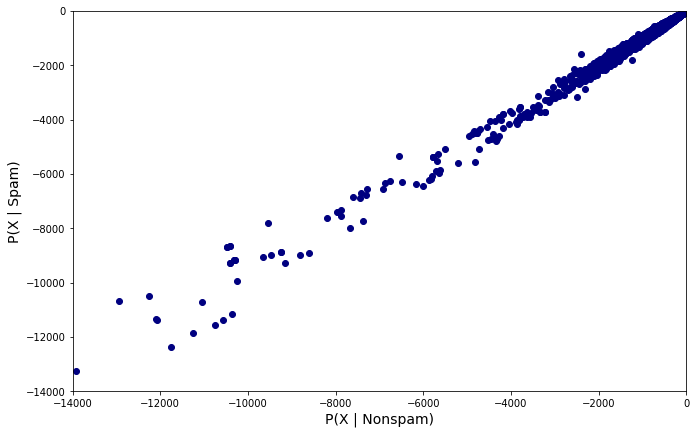

In [33]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

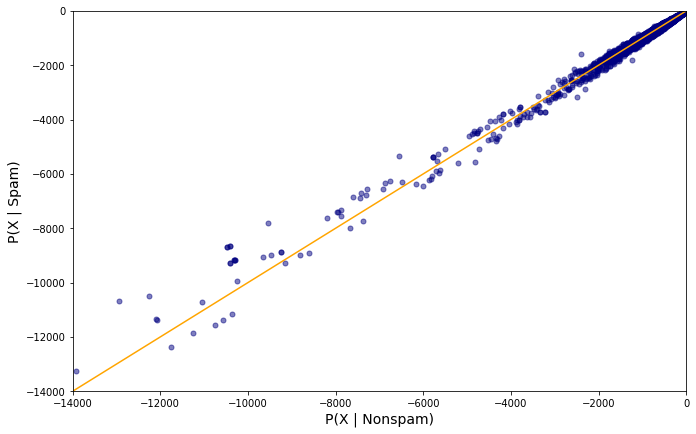

In [34]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

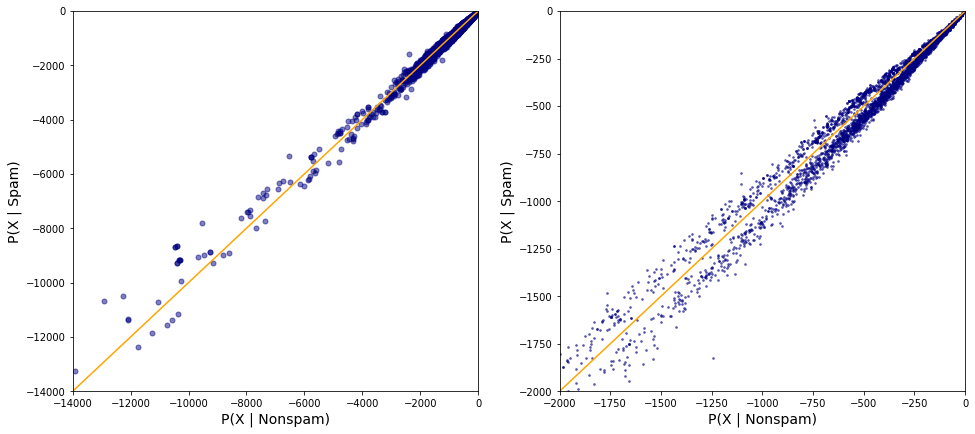

In [35]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [36]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

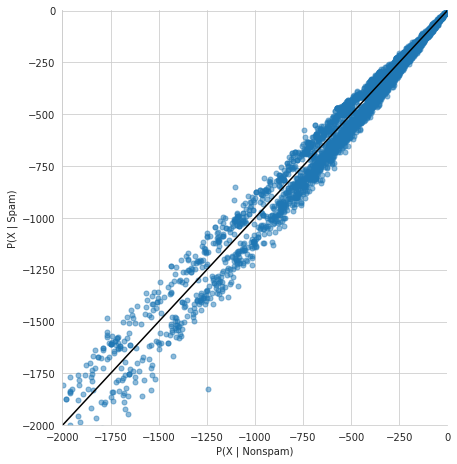

In [49]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

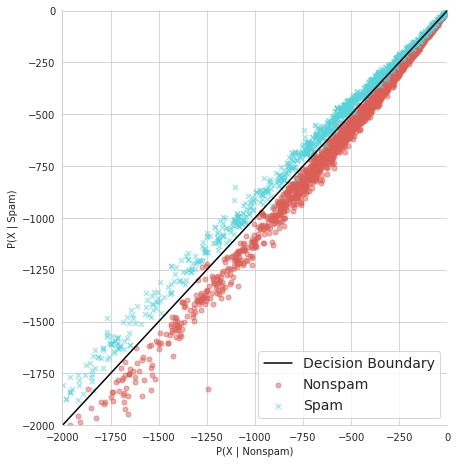

In [52]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)


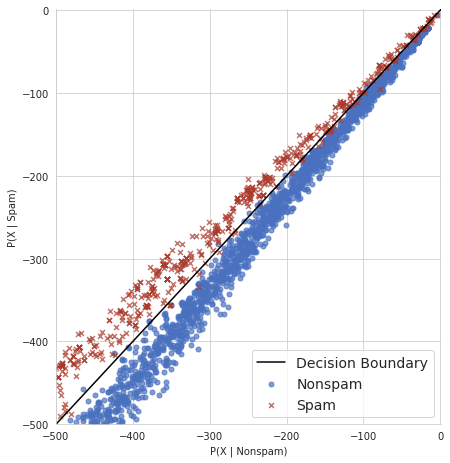

In [53]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

In [54]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([2803, 1209]))

In [55]:
true_pos = (y_test == 1) & (prediction == 1)

In [56]:
true_pos.sum()

1188

In [57]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

21

In [58]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

59

In [59]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 95.27%


In [60]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.983


In [61]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
